# Chargement des données
Je charge les données depuis le site internet sans créer de fichier local. Les données ne seront présentes qu'en mémoire. 

In [4]:
from urllib.request import urlopen
from zipfile import ZipFile
from scipy.io import arff
import pandas as pd
import seaborn as sn
from io import BytesIO, TextIOWrapper

resp = urlopen(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00212/vertebral_column_data.zip"
)
zipfile = ZipFile(BytesIO(resp.read()))

in_mem = TextIOWrapper(zipfile.open("column_3C_weka.arff"), encoding="ascii")
data = arff.loadarff(in_mem)
df = pd.DataFrame(data[0])

df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Hernia'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Hernia'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Hernia'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Hernia'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Hernia'


# Exploration des données
Maintenant que les données sont chargées, nous pouvons faire de l'exploration de données.

In [5]:
df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


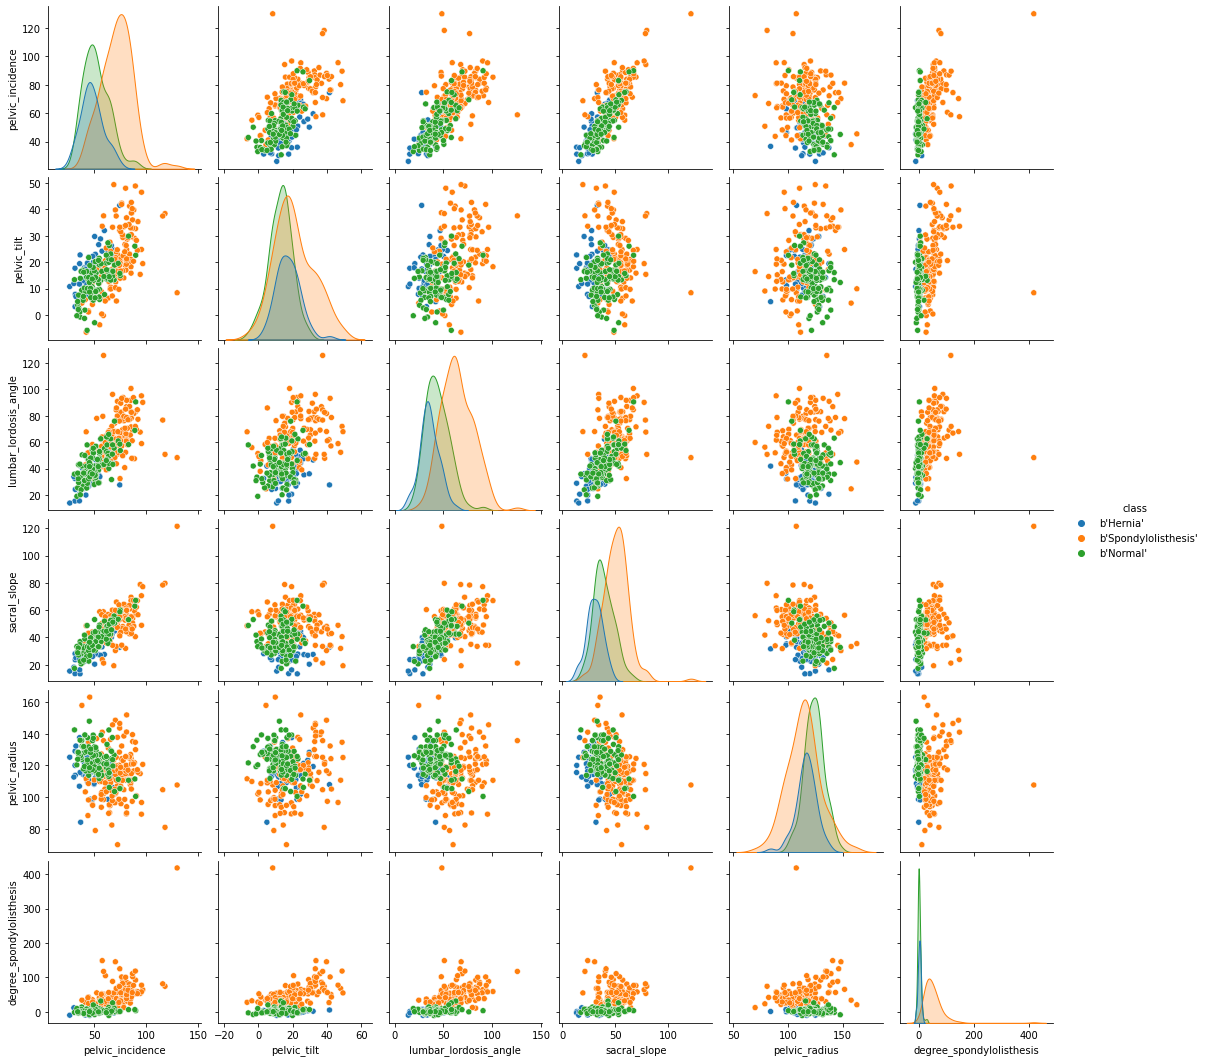

In [6]:
sn.pairplot(df, hue="class")

# Première modélisation
Nous séparons les labels des variables explicatives puis nous transformons les labels. Une fois ces premiers traitements effectués, nous pouvons splitter nos données et les centrer et les réduire avant d'appliquer l'analyse discriminante linéaire.  

In [7]:
Y = df["class"]
X = df.copy()
del X["class"]

In [8]:
labels = Y.unique()
labels.sort()

In [9]:
for i, l in enumerate(labels):
    Y[Y == l] = i
Y.unique()
Y = Y.astype(int)

/tmp/ipykernel_31833/3325469117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[Y==l]=i


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Xa, Xt, Ya, Yt = train_test_split(
    X, Y, shuffle=True, test_size=0.5, stratify=Y
)

sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa = sc.transform(Xa)
Xt = sc.transform(Xt)

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [12]:
# LDA
clf_lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
clf_lda.fit(Xa, Ya)

LinearDiscriminantAnalysis(store_covariance=True)

In [13]:
Ya_pred = clf_lda.predict(Xa)
err_app = sum(Ya_pred != Ya) / Ya.size
print("LDA : taux d'erreur d'apprentissage = {:.2f}%".format(100 * err_app))
Yt_pred = clf_lda.predict(Xt)
err_test = sum(Yt_pred != Yt) / Yt.size
print(
    "LDA : taux d'erreur sur les donnees test = {:.2f}%".format(100 * err_test)
)

LDA : taux d'erreur d'apprentissage = 15.48%
LDA : taux d'erreur sur les donnees test = 18.71%


# Conclusion
Nous voyons par l'étude des données, avec la librairie seaborn  que les 3 classes peuvent être discriminées. Aussi, en faisant une analyse discriminante linéaire, nous avons un taux d'erreur d'environ 19% sur les données test sachant que nous n'avons pas été en profondeur dans la modélisation de nos données.